# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [25]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [44]:
height_1=df_08.query('fuel in ["CNG", "ethanol"]').model.count()
height_2=df_18[(df_18['fuel'] == 'Electricity') | (df_18['fuel'] == 'Ethanol')].model.nunique()
height_2

26

There are 24 more models of alternative fuel vehicles


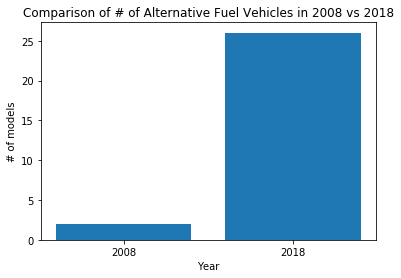

In [45]:
plt.bar([1,2], [height_1, height_2], tick_label=['2008', '2018'])
plt.title('Comparison of # of Alternative Fuel Vehicles in 2008 vs 2018')
plt.xlabel('Year')
plt.ylabel('# of models');
print('There are {} more models of alternative fuel vehicles'.format(height_2-height_1))

### Q2: How much have vehicle classes improved in fuel economy?  

In [51]:
a=df_08.groupby('veh_class')['cmb_mpg'].mean()

In [52]:
b=df_18.groupby('veh_class')['cmb_mpg'].mean()

In [55]:
diff = b-a
diff

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

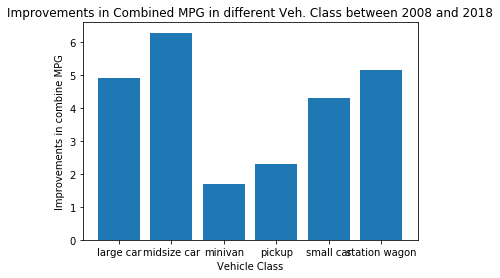

In [67]:
diff.dropna(inplace=True)
plt.bar(diff.index, diff)
plt.title("Improvements in Combined MPG in different Veh. Class between 2008 and 2018")
plt.xlabel('Vehicle Class')
plt.ylabel('Improvements in combine MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [71]:
df_08.query('smartway == "yes"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [72]:
df_08.query('smartway == "no"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,4.056837,6.771005,6.293245,15.133443,21.299835,17.316310,4.149918
std,1.203933,1.882335,0.551479,2.564736,3.366852,2.766868,1.629634
min,1.300000,2.000000,4.000000,8.000000,13.000000,10.000000,0.000000
25%,3.200000,6.000000,6.000000,13.000000,19.000000,15.000000,3.000000
50%,3.800000,6.000000,6.000000,15.000000,21.000000,18.000000,5.000000
75%,4.900000,8.000000,7.000000,17.000000,24.000000,19.000000,5.000000
max,8.400000,16.000000,9.500000,21.000000,28.000000,23.000000,7.000000


In [75]:
df_18.query('smartway == "Yes"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1.753846,3.923077,4.879121,31.483516,39.296703,34.439560,7.538462
std,0.420399,0.452911,1.769087,11.239180,9.410980,10.214596,0.860332
min,1.200000,3.000000,3.000000,25.000000,27.000000,27.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.600000,4.000000,5.000000,28.000000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,30.000000,40.000000,34.000000,8.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [76]:
df_18.query('smartway == "Elite"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,17.000000,17.0,17.0,17.000000,17.000000,17.000000,17.0
mean,1.970588,4.0,7.0,53.235294,53.117647,53.000000,10.0
std,0.277859,0.0,0.0,25.914594,21.854297,24.065016,0.0
min,1.500000,4.0,7.0,26.000000,28.000000,26.000000,10.0
25%,2.000000,4.0,7.0,27.000000,33.000000,29.000000,10.0
50%,2.000000,4.0,7.0,48.000000,47.000000,46.000000,10.0
75%,2.000000,4.0,7.0,66.000000,68.000000,67.000000,10.0
max,2.500000,4.0,7.0,113.000000,99.000000,106.000000,10.0


### Q4: What features are associated with better fuel economy?

In [77]:
df_08['cmb_mpg'].describe()

count    987.000000
mean      19.788247
std        4.251565
min       10.000000
25%       17.000000
50%       20.000000
75%       22.000000
max       46.000000
Name: cmb_mpg, dtype: float64

In [78]:
df_08.query('cmb_mpg > 22').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.314583,4.404167,7.385417,22.533333,29.912500,25.279167,7.383333
std,0.389823,0.719704,1.304320,3.415283,2.705304,2.824205,0.609319
min,1.300000,4.000000,6.000000,19.000000,24.000000,23.000000,7.000000
25%,2.000000,4.000000,6.000000,21.000000,28.000000,24.000000,7.000000
50%,2.400000,4.000000,7.000000,22.000000,30.000000,24.000000,7.000000
75%,2.500000,5.000000,9.000000,23.000000,31.000000,26.000000,8.000000
max,3.500000,6.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [79]:
df_18['cmb_mpg'].describe()

count    832.000000
mean      24.030048
std        8.483171
min       10.000000
25%       19.000000
50%       23.000000
75%       27.000000
max      106.000000
Name: cmb_mpg, dtype: float64

In [80]:
df_08.query('cmb_mpg > 27').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,37.000000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1.848649,4.0,7.756757,28.351351,33.513514,30.243243,8.378378
std,0.311468,0.0,1.427029,4.939727,3.678931,3.774221,0.594014
min,1.300000,4.0,6.000000,24.000000,27.000000,28.000000,8.000000
25%,1.600000,4.0,7.000000,25.000000,32.000000,28.000000,8.000000
50%,1.800000,4.0,7.000000,27.000000,33.000000,29.000000,8.000000
75%,2.000000,4.0,9.500000,29.000000,35.000000,31.000000,9.000000
max,2.500000,4.0,9.500000,48.000000,45.000000,46.000000,10.000000
